In [1]:
#Description: This is a python program for finance
# This program will show you how to compute portfolio simple returns, get daily returns and volatility, etc. 

In [6]:
from datetime import datetime
import time
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
#Get stock symbols for FAANG
stockSymbols = ["FB","AMZN","AAPL","NFLX","GOOG"]

In [8]:
#Get stock starting date
stockStartDate = '2013-01-01'

In [9]:
#Get today's date and format it in the form YYY-mm-dd
today = time.strftime('%Y-%m-%d')
print(today)

2021-02-05


In [10]:
# Get the number of assests in the portfolio 
numAssets = len(stockSymbols) 
# Print the number of assests in your portfolio 
print('You have '+ str(numAssets)+ ' assets in your portfolio')

You have 5 assets in your portfolio


In [11]:
# Create a function to get the stock price(s) of the portfolio 
def getMyPortfolio(stocks= stockSymbols, start = stockStartDate, end = today, col='Adj Close'):     
  data =  web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]     
  return data

In [12]:
# Get the stock portfolio Adj. Close price 
my_stocks = getMyPortfolio(stockSymbols)
# Show my stocks
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.065252,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.849854,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.380499,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.284145,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.327972,13.880000,365.280823
...,...,...,...,...,...
2021-02-01,262.010010,3342.879883,134.139999,539.039978,1901.349976
2021-02-02,267.079987,3380.000000,134.990005,548.159973,1927.510010
2021-02-03,266.649994,3312.530029,133.940002,539.450012,2070.070068


In [13]:
# Create a function to visualize the stock/portfolio
def showGraph(stocks= stockSymbols,start=stockStartDate, end=today, col='Adj Close'):
  
  # Create the title 
  title = 'Portfolio ' + col + ' Price History'
  
  #Get the stocks
  my_stocks = getMyPortfolio(stocks= stocks, start=start, end=end, col = col)
  
  # Visualize the price history
  plt.figure(figsize=(12.2,4.5)) 
  # Loop through each stock and plot the Adj Close for each day
  for c in my_stocks.columns.values:
    plt.plot( my_stocks[c],  label=c)
  
  plt.title(title)
  plt.xlabel('Date',fontsize=18)
  plt.ylabel(col +' Price USD ($)',fontsize=18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()


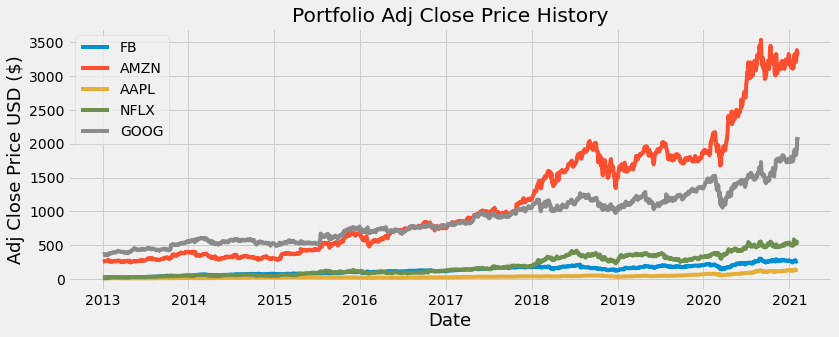

In [14]:
# Show the adjusted close price of FAANG                              
showGraph(stockSymbols)

In [ ]:
# try another style https://www.dunderdata.com/blog/view-all-available-matplotlib-styles
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    plt.style.use(style)
    showGraph(stockSymbols)

In [15]:
# Calculate Simple Returns
daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-02-01,0.014245,0.042630,0.016520,0.012491,0.035740
2021-02-02,0.019350,0.011104,0.006337,0.016919,0.013759
2021-02-03,-0.001610,-0.019962,-0.007778,-0.015889,0.073961


In [16]:
# Show the stock correlation
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.522528,0.457723,0.359342,0.567925
AMZN,0.522528,1.000000,0.456727,0.453960,0.602928
AAPL,0.457723,0.456727,1.000000,0.269771,0.520531
NFLX,0.359342,0.453960,0.269771,1.000000,0.415332
GOOG,0.567925,0.602928,0.520531,0.415332,1.000000


In [17]:
# Show the co-variance matrix for simple returns (diagonal is the daily variance)
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000471,0.000219,0.000179,0.000227,0.000201
AMZN,0.000219,0.000373,0.000159,0.000255,0.000190
AAPL,0.000179,0.000159,0.000326,0.000142,0.000153
NFLX,0.000227,0.000255,0.000142,0.000847,0.000197
GOOG,0.000201,0.000190,0.000153,0.000197,0.000266


In [18]:
# Show the variance
daily_simple_returns.var()

Symbols
FB      0.000471
AMZN    0.000373
AAPL    0.000326
NFLX    0.000847
GOOG    0.000266
dtype: float64

In [19]:
import math
math.sqrt(0.000471)

0.021702534414210706

In [20]:
# Print the standard deviation
print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


Symbols
FB      0.021704
AMZN    0.019314
AAPL    0.018063
NFLX    0.029101
GOOG    0.016316
dtype: float64

In [21]:
plt.style.use('seaborn-poster')
plt.style.use('fivethirtyeight')

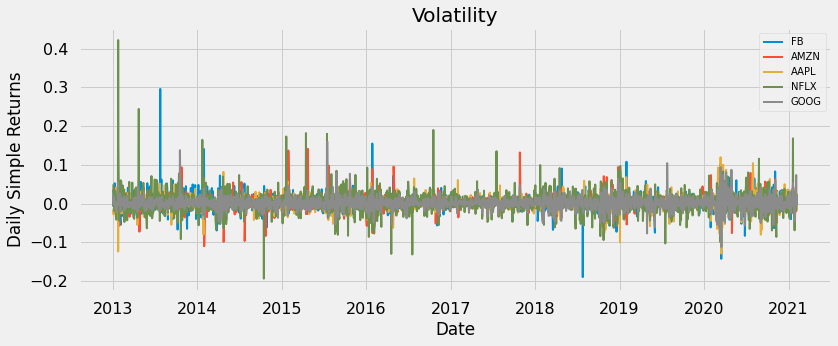

In [22]:
# Visualize the stocks daily simple returns / volatility 
plt.figure(figsize=(12,4.5)) #Set the figure size (width, height)
# Loop through each stock and plot the simple returns for each day
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)
# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper right', fontsize=10)
plt.title('Volatility')
plt.ylabel('Daily Simple Returns') #Label the Y-axis simple returns
plt.xlabel('Date')
plt.show()

In [23]:
# Show the mean / average of the daily simple return
dailyMeanSimpleReturns = daily_simple_returns.mean()
# Print the daily mean simple return
print("The daily mean simple return: ")
print(dailyMeanSimpleReturns)

The daily mean simple return: 
Symbols
FB      0.001342
AMZN    0.001446
AAPL    0.001185
NFLX    0.002243
GOOG    0.000997
dtype: float64


In [24]:
# Calculate the expected portfolio daily performance with weights
# 40% FB, 10% AMZN, 30% AAPL, 10% NFLX, 10% GOOG
randomWeights = np.array([0.4, 0.1, 0.3,0.1,0.1])
portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns*randomWeights) 
# Print the daily expected portfolio return
print("The daily expected portfolio return: "+str(portfolioSimpleReturn))

The daily expected portfolio return: 0.0013608363680482054


In [25]:
# Print the expected annual portfolio simple return
# The number 253 was calculated from 365.25 (days on average per year) * 5/7 (proportion work days per week) — 6 (weekday holidays) — 3*5/7 (fixed date holidays) = 252.75 ≈ 253.
print("Expected annualised portfolio simple return : "+ str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple return : 0.344291601116196


In [26]:
# Calculate the growth of our investment
dailyCumulSimplReturn = (daily_simple_returns+1).cumprod()
# Show the cumulative simple return
dailyCumulSimplReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987378,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959874,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956796,1.055972,1.013896
...,...,...,...,...,...
2021-02-01,9.357500,12.991644,7.860417,41.009452,5.277502
2021-02-02,9.538571,13.135906,7.910226,41.703290,5.350114
2021-02-03,9.523214,12.873693,7.848697,41.040647,5.745812


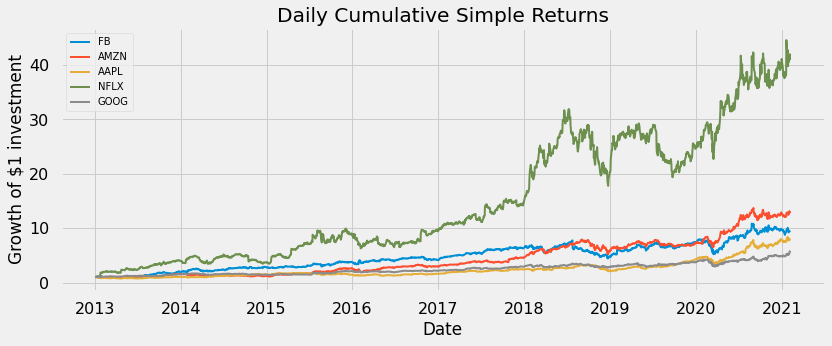

In [27]:
# Visualize the daily cumulative simple returns
fig = plt.figure(figsize=(12.2,4.5))
for c in dailyCumulSimplReturn.columns.values:
  plt.plot(dailyCumulSimplReturn.index, dailyCumulSimplReturn[c], lw=2, label=c)
# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper left', fontsize=10)
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.title("Daily Cumulative Simple Returns")
plt.show()